In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import galsim
from lsstetc import ETC
import numpy as np

In [2]:
band = "i"
pixel_scale = 0.2 # arcsec
stamp_size = 31 # pixels
threshold = 0.0
nvisits = 50
visit_time = 30

flux = 1.0
gal = galsim.Gaussian(flux=flux, sigma=1) # sigma = 2 arcsec
#gal = galsim.Sersic(n=5, half_light_radius=0.2)
psf = galsim.Gaussian(fwhm=0.67) # Full-width half-max of the PSF in arcseconds

profile = galsim.Convolve([gal, psf])

etc = ETC(band, profile=profile, pixel_scale=pixel_scale, stamp_size=stamp_size,
              threshold=threshold, nvisits=nvisits, visit_time=visit_time)

TypeError: ETC.__init__() got an unexpected keyword argument 'nvisits'

In [ ]:
etc.get_sigma_sky(nvisits)

array([86.7194609])

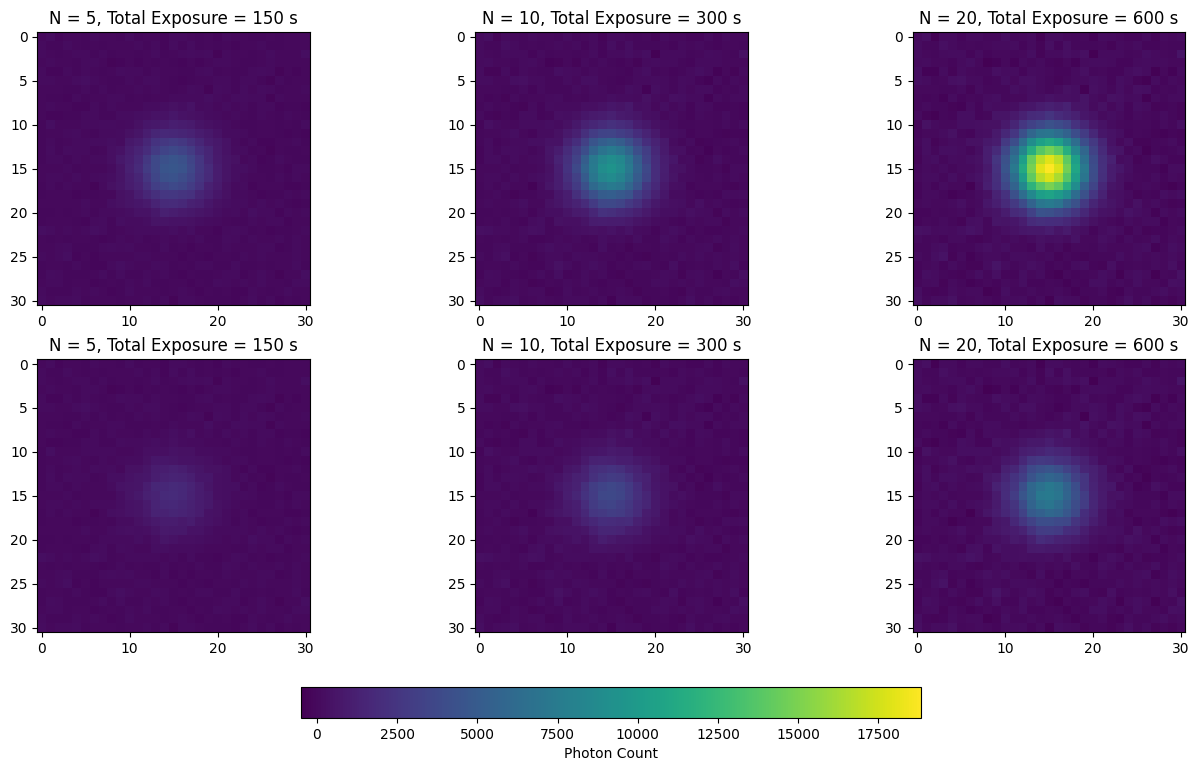

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Store all images to find the global min/max for colorbar scaling
all_images = []

for i, m in enumerate([20, 21]):
    for j, nvisits in enumerate([5, 10, 20]):
        gal = galsim.Gaussian(flux=1.0, sigma=0.5) # sigma = 0.5 arcsec
        #gal = galsim.Sersic(n=5, half_light_radius=0.2)
        psf = galsim.Gaussian(fwhm=0.67) # Full-width half-max of the PSF in arcseconds

        profile = galsim.Convolve([gal, psf])

        etc = ETC(band, profile=profile, pixel_scale=pixel_scale, stamp_size=stamp_size,
                    threshold=threshold, visit_time=visit_time)
        img = galsim.Image(etc.stamp_size, etc.stamp_size, scale=etc.pixel_scale)
        flux = etc.s0 * 10**(-0.4*(m - 24.0)) * nvisits * etc.visit_time
        profile = profile.withFlux(flux)
        profile.drawImage(image=img)
        gd = galsim.GaussianNoise(galsim.BaseDeviate(1), sigma=etc.get_sigma_sky(nvisits))
        img.addNoise(gd)
        # Store the image array for later colorbar calculation
        all_images.append(img.array)
        
        # Use vmin/vmax to ensure consistent scaling across all subplots
        im = axs[i, j].imshow(img.array)
        axs[i, j].set_title(f'N = {nvisits}, Total Exposure = {np.array(nvisits) * etc.visit_time} s')

# Find global min/max across all images
vmin = min(img.min() for img in all_images)
vmax = max(img.max() for img in all_images)

# Update all subplots with consistent color scaling
for i in range(2):
    for j in range(3):
        axs[i, j].imshow(all_images[i*3 + j], vmin=vmin, vmax=vmax)

# Add a single colorbar that applies to all subplots
im = axs[0,0].imshow(all_images[0], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.5, pad=0.1, label='Photon Count')

# Adjust layout to prevent overlap
plt.subplots_adjust(bottom=0.28)  # Make room for the horizontal colorbar below
plt.show()

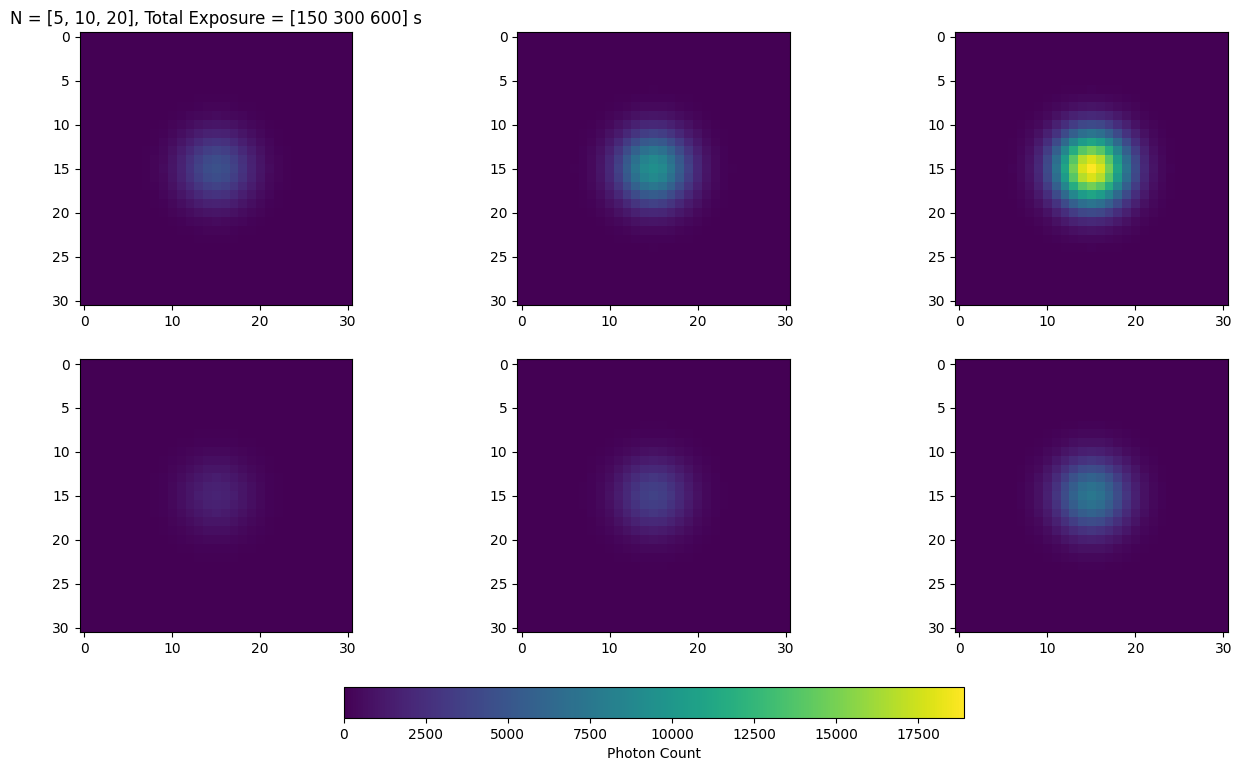

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Store all images to find the global min/max for colorbar scaling
all_images = []

mags = [20, 21]
nvisits = [5, 10, 20]
gal = galsim.Gaussian(flux=1.0, sigma=0.5) # sigma = 0.5 arcsec
#gal = galsim.Sersic(n=5, half_light_radius=0.2)
psf = galsim.Gaussian(fwhm=0.67) # Full-width half-max of the PSF in arcseconds

profile = galsim.Convolve([gal, psf])

etc = ETC(band, profile=profile, pixel_scale=pixel_scale, stamp_size=stamp_size,
            threshold=threshold, visit_time=visit_time)
pixels, mask = etc.get_pixel_values(mags, nvisits)


# Use vmin/vmax to ensure consistent scaling across all subplots
im = axs[0, 0].imshow(pixels[0, 0])
axs[0, 0].set_title(f'N = {nvisits}, Total Exposure = {np.array(nvisits) * etc.visit_time} s')

# Find global min/max across all images
vmin = pixels.min()
vmax = pixels.max()

# Update all subplots with consistent color scaling
for i in range(2):
    for j in range(3):
        axs[i, j].imshow(pixels[j, i], vmin=vmin, vmax=vmax)

# Add a single colorbar that applies to all subplots
im = axs[0,0].imshow(pixels[0, 0], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs, orientation='horizontal', shrink=0.5, pad=0.1, label='Photon Count')

# Adjust layout to prevent overlap
plt.subplots_adjust(bottom=0.28)  # Make room for the horizontal colorbar below
plt.show()